In [1]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [2]:
# Load the dataset
file_path = r"C:\Users\GURU\Downloads\Decision Tree\Decision Tree\heart_disease.xlsx"

In [3]:
xls = pd.ExcelFile(file_path)

In [4]:
df = pd.read_excel(xls,sheet_name = 'Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
df.shape

(908, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [9]:
df.dropna(inplace = True)

In [10]:
# For numeric columns
df = df.fillna(df.median(numeric_only = True))

In [11]:
#STEP 4: Encode Categorical Columns

In [12]:
df = pd.get_dummies(df,drop_first = True)

In [13]:
#STEP 5: Split into Features and Target

In [14]:
X = df.drop("num",axis = 1)
y = df["num"]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [16]:
print("Train Shape :", X_train.shape)

Train Shape : (676, 18)


In [17]:
print("Test Shape :", X_test.shape)

Test Shape : (170, 18)


In [18]:
#STEP 6: Build Decision Tree Model

In [19]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [20]:
#STEP 7: Evaluate the Model

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output classes
y_test_bin = label_binarize(y_test, classes = [0,1,2,3,4])

# Get probability predictions instead of class labels
y_pred_proba = model.predict_proba(X_test)

# Compute ROC AUC score for multiclass (One-vs-Rest)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba,multi_class = 'ovr')
roc_auc
# Compute ROC AUC score for multiclass (One-vs-Rest)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
print("Multiclass ROC AUC Score:", roc_auc)


Multiclass ROC AUC Score: 0.6021856602446033


In [22]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

# Evaluate using labels
print("Accuracy:\n",accuracy_score(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test,y_pred))
print("confusion Matrix :\n", confusion_matrix(y_test, y_pred))

# Evaluate using probabilities for ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_pred_proba = model.predict_proba(X_test)
print("Multiclass ROC AUC Score:", roc_auc_score(y_test_bin,y_pred_proba,multi_class ='ovr'))

Accuracy:
 0.4823529411764706
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.66      0.68        80
           1       0.33      0.51      0.40        41
           2       0.17      0.21      0.19        14
           3       0.33      0.11      0.17        27
           4       0.50      0.25      0.33         8

    accuracy                           0.48       170
   macro avg       0.41      0.35      0.35       170
weighted avg       0.50      0.48      0.48       170

confusion Matrix :
 [[53 23  2  2  0]
 [14 21  5  1  0]
 [ 3  6  3  1  1]
 [ 4 13  6  3  1]
 [ 1  1  2  2  2]]
Multiclass ROC AUC Score: 0.6021856602446033


In [23]:
#STEP 8: Hyperparameter Tuning

In [24]:
param_grid ={
    "max_depth" : [3,5,7],
    "min_samples_split" : [2, 5, 10],
    "criterion" : ["gini","entropy"]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42) , param_grid, cv = 5)
grid.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10]})

In [25]:
print("Best Parameters :", grid.best_params_)

Best Parameters : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [26]:
best_model = grid.best_estimator_
y_best = best_model.predict(X_test)
print("Accuracy After Turning :", accuracy_score(y_test , y_best))

Accuracy After Turning : 0.5647058823529412


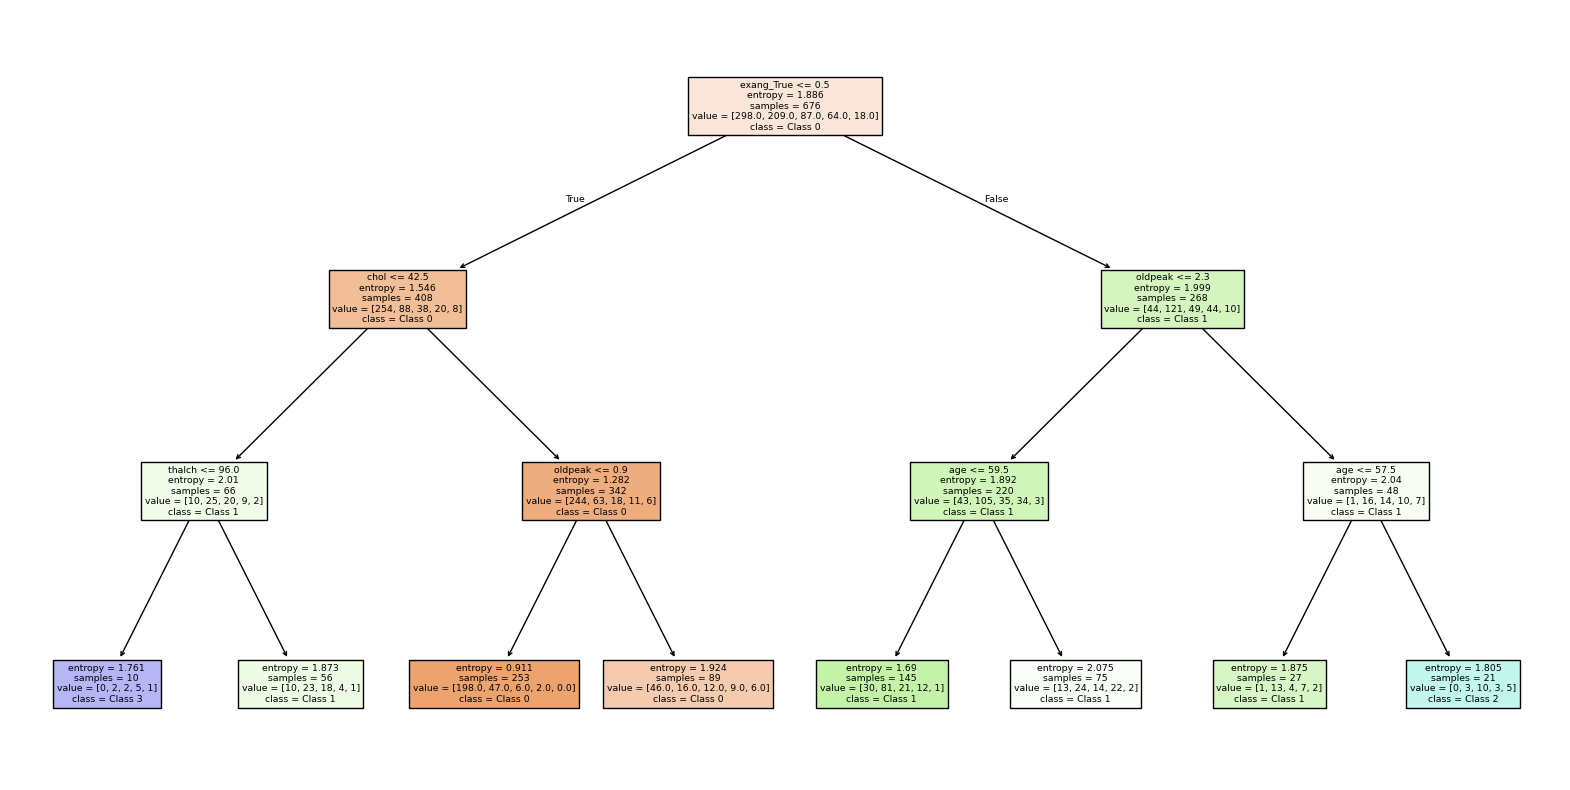

In [27]:
#STEP 9: Visualize the Tree
plt.figure(figsize = (20, 10))
plot_tree(best_model , feature_names = X.columns ,
         class_names = ["Class 0", "Class 1","Class 2", "Class 3", "Class 4"],
         filled = True)
plt.show()

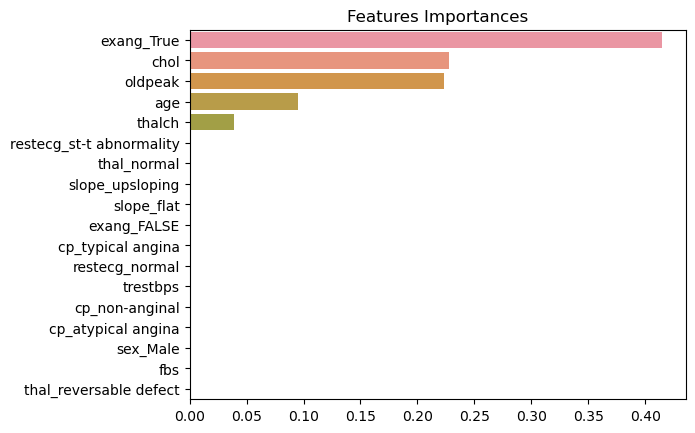

In [28]:
#STEP 10: Feature Importance
importances = pd.Series(best_model.feature_importances_, index = X.columns).sort_values(ascending = False)
sns.barplot(x = importances, y = importances.index)
plt.title("Features Importances")
plt.show()

In [29]:
#Interview Questions:

In [30]:
## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#Answer:
#Some common hyperparameters in decision tree models are:
#max_depth: Limits the maximum depth of the tree. Prevents overfitting by restricting how deep the tree can grow.

#min_samples_split: Minimum number of samples required to split a node. Higher values prevent the model from 
#learning too fine patterns (overfitting).

#min_samples_leaf: Minimum samples required at a leaf node. Helps smooth the model by ensuring a minimum number 
#of samples per leaf.

#max_features: The number of features to consider when looking for the best split. It adds randomness and can 
#help reduce overfitting.

#criterion: Measures the quality of a split, e.g., "gini" or "entropy" for classification. It affects how the 
#tree chooses splits.

#max_leaf_nodes: Limits the number of leaf nodes, helping to simplify the model.
#These hyperparameters help balance the bias-variance tradeoff, improving the model's generalization.

In [31]:
#2. What is the difference between Label Encoding and One-Hot Encoding?
#Answer:

#Label Encoding converts each unique category into a number 
#(e.g., Red = 0, Green = 1, Blue = 2). It’s useful for ordinal data but may introduce unwanted ordinal relationships
#in nominal data.

#One-Hot Encoding creates a binary column for each category 
#(e.g., Red → [1, 0, 0], Green → [0, 1, 0]). It avoids any ordinal relationship and is suitable for nominal data.